
## **Pre-trained model for Cats-vs-Dogs (Model name - VGG16)**

##**Problem Statement:**

The categorization of images into distinct classes is a pervasive task in computer vision, and it has a wide array of applications, including in pet identification and animal monitoring systems. In this assignment, we aim to develop a model capable of accurately distinguishing between cat and dog images. Instead of building a convolutional neural network (CNN) from scratch, we will leverage transfer learning using the VGG16 model, a pre-trained model on the ImageNet dataset. VGG16 is renowned for its effectiveness in image recognition tasks, but it does not have broad categories for cats and dogs. Therefore, we will utilize the convolutional (Conv) layers of VGG16 for feature extraction and add custom fully connected (Cat) layers for the classification task.

**Objectives:**

**Utilize VGG16 for Feature Extraction:**

● Employ the VGG16 model, excluding its top layers, to serve as a feature extractor for cat and dog images.

● Ensure the input images are of the correct size (150x150) and preprocessed appropriately to match VGG16’s requirements.

**Data Preprocessing and Augmentation:**

Implement image data generators for real-time data augmentation, ensuring a robust and varied dataset for training the classification layers.

**Build and Train the Classification Model:**

● Add custom fully connected layers on top of the VGG16 model for the classification task.

● Freeze the convolutional layers of VGG16 to retain the pre-trained features and only train the added classification layers.

**Model Compilation and Training:**

● Compile the model using stochastic gradient descent, categorical cross-entropy as the loss function, and accuracy as the evaluation metric.

● Train the model using the training data, and validate its performance using a validation set.

**Evaluate and Test the Model:**

● Assess the model’s performance based on its accuracy in classifying images into cat or dog categories.

● Implement a prediction function to classify new images, providing the predicted category and the associated confidence level

##**What is VGG16 ?**

The VGG-16 model is a convolutional neural network (CNN) architecture that was proposed by the Visual Geometry Group (VGG) at the University of Oxford. It is characterized by its depth, consisting of 16 layers, including 13 convolutional layers and 3 fully connected layers. VGG-16 is renowned for its simplicity and effectiveness, as well as its ability to achieve strong performance on various computer vision tasks, including image classification and object recognition. The model’s architecture features a stack of convolutional layers followed by max-pooling layers, with progressively increasing depth. This design enables the model to learn intricate hierarchical representations of visual features, leading to robust and accurate predictions. Despite its simplicity compared to more recent architectures, VGG-16 remains a popular choice for many deep learning applications due to its versatility and excellent performance.

##**Installing Packages and Libraries**

In [1]:
! pip install Pillow

In [2]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential,Model
from keras.layers import Flatten,Dense,Dropout

##**Unzipping the dataset**

In [3]:
import zipfile

directory = '/content/drive/MyDrive/cat dog dataset/dogs_vs_cats.zip'    # stored dataset in google drive

unzip_train = zipfile.ZipFile(directory,'r')
unzip_train.extractall()
print("unzipped is successful")
unzip_train.close()

unzipped is successful


##**Creating directories and dataframe**

In [4]:
train_dog_dir = 'dogs_vs_cats/train/dogs'
train_cat_dir = 'dogs_vs_cats/train/cats'
test_dog_dir = 'dogs_vs_cats/test/dogs'
test_cat_dir = 'dogs_vs_cats/test/cats'

filenames_dog_train = os.listdir(train_dog_dir)
filenames_cat_train = os.listdir(train_cat_dir)
filenames_dog_test = os.listdir(test_dog_dir)
filenames_cat_test = os.listdir(test_cat_dir)

data = pd.DataFrame({'dog_train' : filenames_dog_train, 'cat_train': filenames_cat_train})
data.head()

data_test = pd.DataFrame({'dog_test' : filenames_dog_test, 'cat_test' : filenames_cat_test})
data_test.head()

,dog_test,cat_test
0,dog.8544.jpg,cat.4065.jpg
1,dog.7979.jpg,cat.7705.jpg
2,dog.4780.jpg,cat.1424.jpg
3,dog.1886.jpg,cat.10183.jpg
4,dog.1020.jpg,cat.3876.jpg


##**Visualization of dogs**

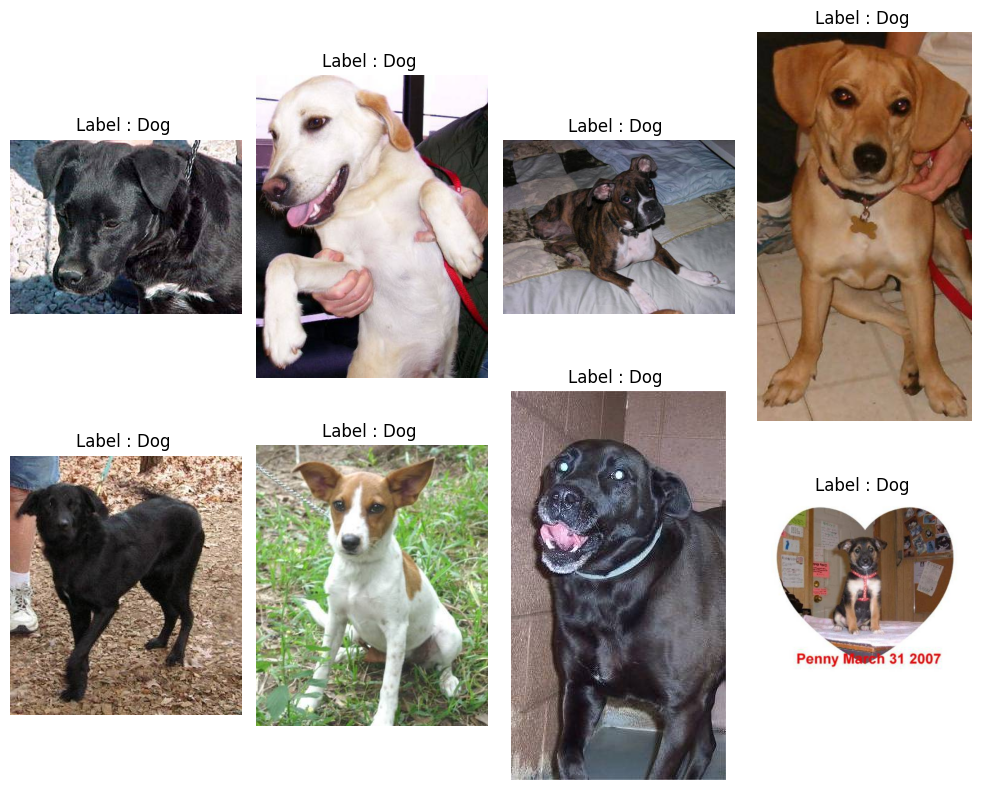

In [5]:

plt.figure(figsize=(10,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    image_path = 'dogs_vs_cats' + '/train' + '/dogs/' + str(data['dog_train'][i])
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Label : Dog ")
    plt.axis('off')
plt.tight_layout()
plt.show()

##**visualization of Cats**

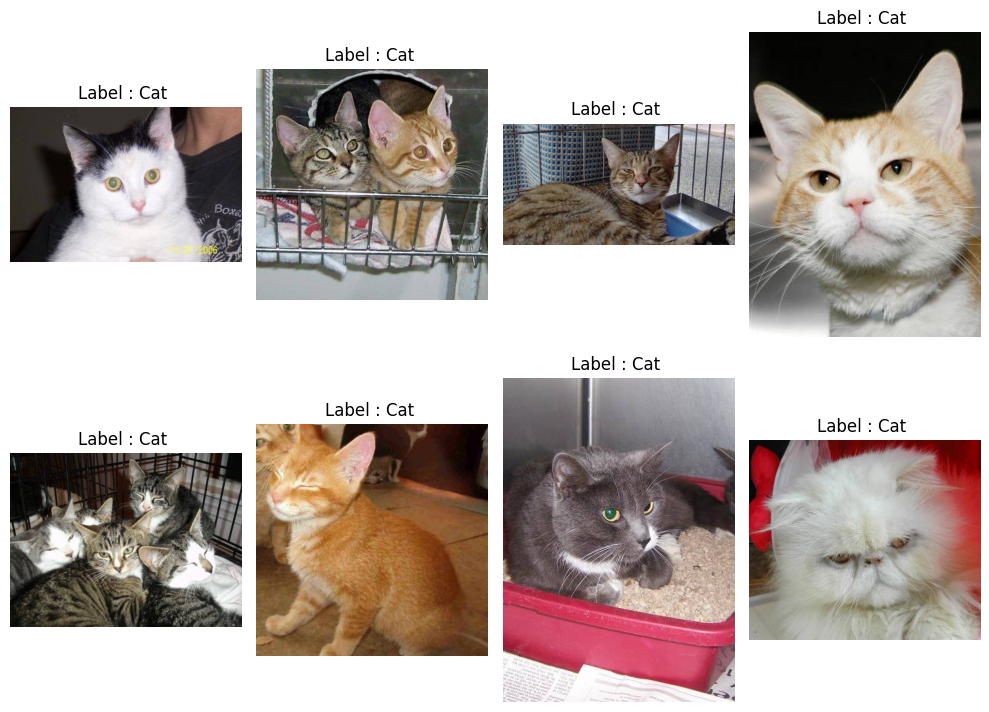

In [6]:

plt.figure(figsize=(10,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    image_path = 'dogs_vs_cats' + '/train' + '/cats/' + str(data['cat_train'][i])
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Label : Cat ")
    plt.axis('off')
plt.tight_layout()
plt.show()

##**using ImageDataGenerator of VGG16**

In [7]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

##**Splitting into training and testing set**

In [8]:

train_dir = 'dogs_vs_cats/train'
test_dir = 'dogs_vs_cats/test'

training_set = image_data_generator.flow_from_directory(directory=train_dir,
                                                    batch_size=32,
                                                    target_size=(150,150),
                                                    class_mode='categorical')


testing_set = image_data_generator.flow_from_directory(directory=test_dir,
                                                    batch_size=32,
                                                    shuffle=False,
                                                    target_size=(150,150),
                                                    class_mode='categorical')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


##**DeepLearning Model - pre-trained model (VGG16)**

In [9]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=(150,150,3))

for layer in vgg16_model.layers:
    layer.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
vgg16_model.input , vgg16_model.outputs

(<KerasTensor shape=(None, 150, 150, 3), dtype=float32, sparse=False, name=keras_tensor>,
 [<KerasTensor shape=(None, 4, 4, 512), dtype=float32, sparse=False, name=keras_tensor_18>])

##**Final Model**

In [11]:

flat = tf.keras.layers.Flatten() (vgg16_model.output)
dropout1 = tf.keras.layers.Dropout(0.20, name="Droput_01") (flat)
dense1 = tf.keras.layers.Dense(128,activation='relu') (dropout1)
dropout2 = tf.keras.layers.Dropout(0.20, name="Dropout_02") (dense1)
output = tf.keras.layers.Dense(2,activation='softmax') (dropout2)

final_model = tf.keras.models.Model(inputs=[vgg16_model.input], outputs=[output])

##**Model Compile**

In [12]:

final_model.compile(optimizer='adam',
                    loss=tf.keras.losses.categorical_crossentropy,
                    metrics=['accuracy'])

##**Callbacks for overfitting and overtraining**

In [13]:

learning_rate = ReduceLROnPlateau(monitor='val_accuracy',patience=2,
                                  factor=0.50, min_lr=0.00001,
                                  verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',patience=5,
                               restore_best_weights=True, verbose=0)

##**Model Fit**

In [ ]:
history = final_model.fit(training_set,
                          validation_data=testing_set,
                          epochs=20,
                          callbacks=[learning_rate,early_stopping])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 131ms/step - accuracy: 0.9347 - loss: 1.1889 - val_accuracy: 0.9656 - val_loss: 0.1076 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.9732 - loss: 0.0814 - val_accuracy: 0.9676 - val_loss: 0.0861 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 127ms/step - accuracy: 0.9783 - loss: 0.0633 - val_accuracy: 0.9640 - val_loss: 0.1044 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.9819 - loss: 0.0505 - val_accuracy: 0.9704 - val_loss: 0.0986 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 127ms/step - accuracy: 0.9853 - loss: 0.0471 - val_accuracy: 0.9672 - val_loss: 0.1076 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9858 - loss: 0.0400
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.9858 - loss: 0

##**Visualize the Val_Loss and Val_Accuracy**

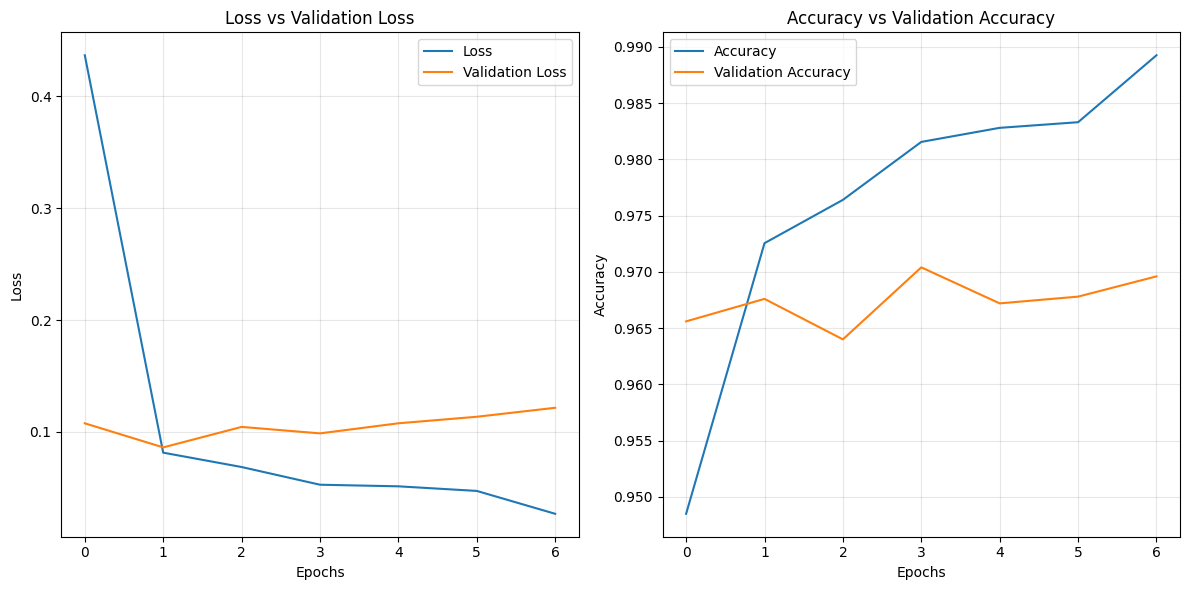

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.30)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.30)
plt.tight_layout()
plt.show()

## **Model Evaluate**

In [23]:
loss, accuracy = final_model.evaluate(testing_set)
print(f"Accuracy of VGG16 Model on testing_set : {accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9719 - loss: 0.0714
Accuracy of VGG16 Model on testing_set : 0.9675999879837036


In [24]:
losst, accuracyt = final_model.evaluate(training_set)
print(f"Accuracy of VGG16 Model on training_set : {accuracyt}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 101ms/step - accuracy: 0.9832 - loss: 0.0448
Accuracy of VGG16 Model on training_set : 0.9843500256538391


## **Prediction**

In [25]:
pred = final_model.predict(testing_set)
results = np.argmax(pred, axis=1)

# creating a data frame
prediction_df = pd.DataFrame({'filename' : testing_set.filenames, 'prediction' : results})
prediction_df.head()

157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step


,filename,prediction
0,cats/cat.10.jpg,0
1,cats/cat.10000.jpg,0
2,cats/cat.10001.jpg,0
3,cats/cat.10007.jpg,0
4,cats/cat.10017.jpg,0


## **function for predicting from dataframe (data_test)**

In [26]:
def predicted(data_test):
    abcd = str(data_test)
    what = abcd.split('.')
    image_path = None
    files = None
    if what[0]=='dog':
        image_path = 'dogs_vs_cats/test/dogs'
        files = 'dogs/' + abcd
    else:
      image_path = 'dogs_vs_cats/test/cats'
      files = 'cats/' + abcd
    image_path = image_path + '/' + abcd
    image = image_path
    img = load_img(image, target_size=(150,150))
    plt.imshow(img)
    plt.tight_layout()
    plt.axis('off')
    plt.show()
    ac = prediction_df[prediction_df['filename']==files]['prediction'].values
    if ac==0:
         print(f"\n\n--------------------Predicted Label : Cat------------------------")
    elif ac>0:
      print(f"\n\n-----------------------Predicted Label : Dog-------------------------")

In [27]:
# test dataframe
data_test.head(10)

,dog_test,cat_test
0,dog.8544.jpg,cat.4065.jpg
1,dog.7979.jpg,cat.7705.jpg
2,dog.4780.jpg,cat.1424.jpg
3,dog.1886.jpg,cat.10183.jpg
4,dog.1020.jpg,cat.3876.jpg
5,dog.441.jpg,cat.158.jpg
6,dog.4792.jpg,cat.8597.jpg
7,dog.10126.jpg,cat.3420.jpg
8,dog.9325.jpg,cat.11308.jpg
9,dog.994.jpg,cat.3005.jpg


## **take test_data in the format of dataframe to predict**

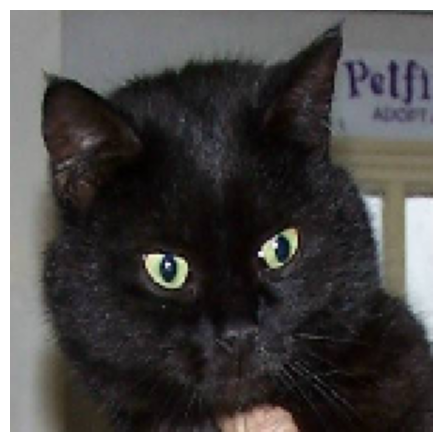



--------------------Predicted Label : Cat------------------------


In [28]:
predicted(data_test['cat_test'][150])

## **END**